d:\anaconda3\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
 11%|████████▌                                                                  | 1139/10000 [00:00<00:05, 1567.72it/s]

after 1000 epoch, Loss is 0.6930064558982849


 22%|████████████████▍                                                          | 2197/10000 [00:01<00:05, 1365.10it/s]

after 2000 epoch, Loss is 0.6710414886474609


 33%|████████████████████████▌                                                  | 3272/10000 [00:02<00:04, 1479.50it/s]

after 3000 epoch, Loss is 0.6593133211135864


 42%|███████████████████████████████▊                                           | 4234/10000 [00:02<00:03, 1529.52it/s]

after 4000 epoch, Loss is 0.6530628204345703


 53%|███████████████████████████████████████▉                                   | 5318/10000 [00:03<00:03, 1498.59it/s]

after 5000 epoch, Loss is 0.6497326493263245


 61%|█████████████████████████████████████████████▌                             | 6082/10000 [00:04<00:02, 1365.80it/s]

after 6000 epoch, Loss is 0.6479177474975586


 72%|█████████████████████████████████████████████████████▋                     | 7166/10000 [00:04<00:01, 1423.92it/s]

after 7000 epoch, Loss is 0.6469224095344543


 81%|████████████████████████████████████████████████████████████▉              | 8131/10000 [00:05<00:01, 1487.74it/s]

after 8000 epoch, Loss is 0.6463443040847778


 92%|█████████████████████████████████████████████████████████████████████▎     | 9235/10000 [00:06<00:00, 1524.80it/s]

after 9000 epoch, Loss is 0.6460176706314087


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1503.00it/s]

after 10000 epoch, Loss is 0.6458277702331543


<IPython.core.display.Javascript object>


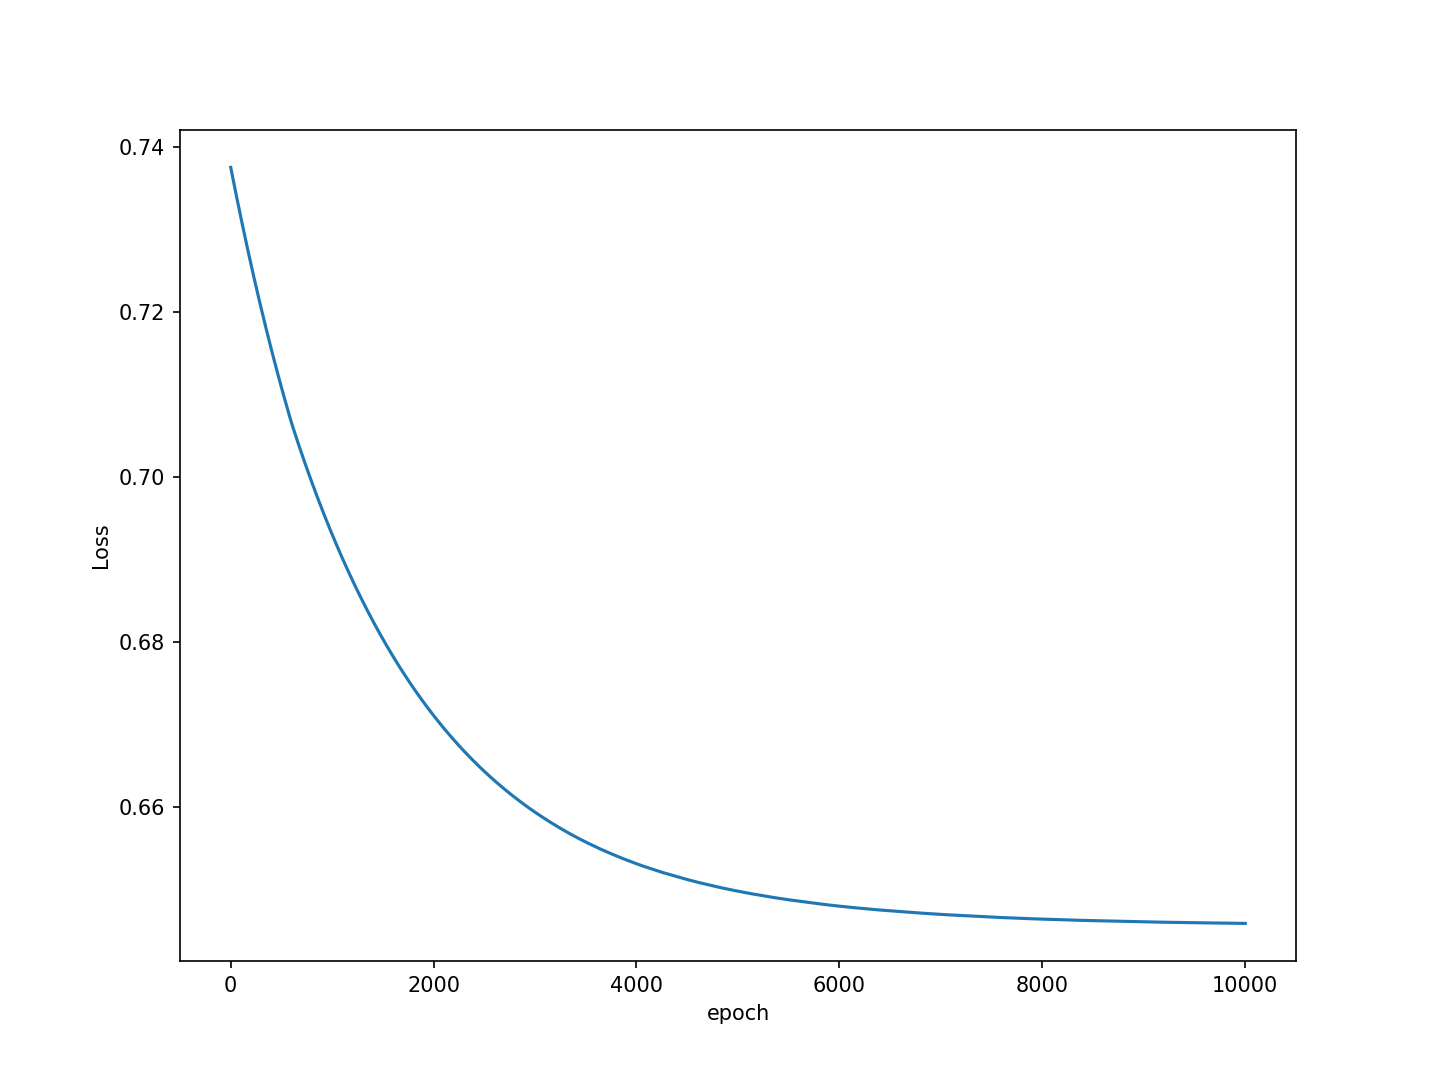

In [12]:
import numpy as np
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib notebook

# 准备数据
xy = np.loadtxt('diabetes.csv.gz',delimiter=',',dtype=np.float32)
x_data = torch.from_numpy(xy[:,:-1])
y_data = torch.from_numpy(xy[:,[-1]])  # 最里面的中括号使最后得到的是一个二维矩阵而不是一个一维向量

# 设计模型
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.activate = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.activate(self.linear1(x))
        x = self.activate(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x
model = Model()

# 构造损失函数 优化器
criterion = torch.nn.BCELoss(size_average=True)  # 交叉熵损失函数   Binary Cross Entropy 
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

# 循环训练
loss_ls =[]
epoch = 10000
for i in tqdm(range(epoch)):
    y_pred = model(x_data)  # 前向传播
    loss = criterion(y_pred, y_data)
    loss_ls.append(loss)
    if (i+1)% 1000 == 0:
        print("after {} epoch, Loss is {}".format(i+1, loss.item()))
        
    optimizer.zero_grad()  # 梯度清零  注意是对optimizer
    loss.backward()  # 反向传播  注意是对loss
    optimizer.step()  # 权重更新  注意是对optimizer
    
    
epoch_ls = np.arange(1,epoch+1,1)
plt.plot(epoch_ls, loss_ls)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

In [2]:
xy

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         0.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         0.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         0.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]], dtype=float32)

In [4]:
torch.Tensor(xy[:,:-1])

tensor([[-0.2941,  0.4874,  0.1803,  ...,  0.0015, -0.5312, -0.0333],
        [-0.8824, -0.1457,  0.0820,  ..., -0.2072, -0.7669, -0.6667],
        [-0.0588,  0.8392,  0.0492,  ..., -0.3055, -0.4927, -0.6333],
        ...,
        [-0.4118,  0.2161,  0.1803,  ..., -0.2191, -0.8574, -0.7000],
        [-0.8824,  0.2663, -0.0164,  ..., -0.1028, -0.7686, -0.1333],
        [-0.8824, -0.0653,  0.1475,  ..., -0.0939, -0.7976, -0.9333]])

In [5]:
x_data

tensor([[-0.2941,  0.4874,  0.1803,  ...,  0.0015, -0.5312, -0.0333],
        [-0.8824, -0.1457,  0.0820,  ..., -0.2072, -0.7669, -0.6667],
        [-0.0588,  0.8392,  0.0492,  ..., -0.3055, -0.4927, -0.6333],
        ...,
        [-0.4118,  0.2161,  0.1803,  ..., -0.2191, -0.8574, -0.7000],
        [-0.8824,  0.2663, -0.0164,  ..., -0.1028, -0.7686, -0.1333],
        [-0.8824, -0.0653,  0.1475,  ..., -0.0939, -0.7976, -0.9333]])

In [6]:
y_data

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
      

In [11]:
y_pred

tensor([[0.6448],
        [0.6625],
        [0.6312],
        [0.6839],
        [0.6209],
        [0.6453],
        [0.6707],
        [0.6385],
        [0.6542],
        [0.6408],
        [0.6473],
        [0.6303],
        [0.6258],
        [0.6547],
        [0.6402],
        [0.6392],
        [0.6413],
        [0.6816],
        [0.6649],
        [0.6469],
        [0.6406],
        [0.6367],
        [0.6388],
        [0.6528],
        [0.6430],
        [0.6656],
        [0.6488],
        [0.6436],
        [0.6565],
        [0.6432],
        [0.6723],
        [0.6409],
        [0.6379],
        [0.6470],
        [0.6302],
        [0.6381],
        [0.6537],
        [0.6435],
        [0.6592],
        [0.6349],
        [0.6521],
        [0.6421],
        [0.6412],
        [0.6187],
        [0.6488],
        [0.6544],
        [0.6483],
        [0.6418],
        [0.6646],
        [0.6703],
        [0.6652],
        [0.6453],
        [0.6400],
        [0.6813],
        [0.6471],
        [0